# Assingment from KYC Station

"""
* Please first read the README-GENERAL.MD file
* Please verify that you have also received an attached article: nips02-AA35.pdf (usage of it is mentioned in one of the
sub sections)

ML Candidate Evaluation
=======================

The following is a short machine learning task that you are asked to perform in Python.


Tasks
=====

The dataset consists of a subset of the classical 20_newsgroups dataset. There
are a few thousand newsgroup discussions, classified into four topics. Your
goal is to write a semi-supervised system to classify newsgroups into topics.

 ### 1) Load the training dataset. In a remark below this line describe bothdatasets in few words.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import re

Let's download the data

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

X = dataset.data  # this is the data
y = dataset.target  # these are the class labels

print(len(X))

3387


Let's check to see how an entry looks like

In [3]:
print(X[727])

From: king@ctron.com (John E. King)
Subject: Re: After 2000 years, can we say that Christian Morality is oxymoronic?
Organization: Cabletron Systems Inc.
Lines: 16
NNTP-Posting-Host: saturn.ctron.com
To: "Andrew A. Houghton" <ah0i+@andrew.cmu.edu>



Andrew A. Houghton"  writes:  

>I'm still waiting to hear a good response from a christian type..  how
>is christ's word (as quoted by Paul) reconciled with current christian
>beliefs?

Almost one third of the world's population claim to be Christian.  But
any similarity between their beliefs and lifestyle to the first century
model is purely coincidental.  At Luke 18:8 it states, "...nevertheless,
when the son of man returns, will he really find the faith on the earth?"


Jack




In [4]:
y[727]

3

Apparently they look like messages with different features ('from', 'subject', the text itself, etc..); their correspondent labels are probably categories encoded from 1 to 4.

### 2) Find the 1000 most common words in the dataset. (Bonus: try to ignore case, plurality, etc.  There are additional pre-processing steps that you should take in order to improve results. Try to think of a few.  write what you chose to ignore)

First let's parse everything into a nice dataframe

In [5]:
features = set([])
field = re.compile('^[a-zA-Z][^ :]+:')
for an_entry in X:
    for line in an_entry.split('\n'):
        match = field.findall(line)
        if match:
            features.add(match[0][:-1])
        else:
            break #if doesn't match, header is over. Next entry.

In [6]:
features = ['text'] + list(features)
features

['text',
 'Organization',
 'Keywords',
 'X-News-Reader',
 'Original-Sender',
 'Nf-ID',
 'ReplyTo',
 'X-Added',
 'X-Newsreader',
 'Comments',
 'X-Alt.reply-Address',
 'Disclaimer',
 'Nntp-Posting-User',
 'X-NewsSoftware',
 'X-XXMessage-ID',
 'X-Sender',
 'X-Cc',
 'Originator',
 'To',
 'Nf-From',
 'X-To',
 'Expires',
 'X-UserAgent',
 'Subject',
 'Cc',
 'Summary',
 'In-reply-to',
 'IMPORTANT-INFO',
 'X-Received',
 'News-Software',
 'X-Md4-Signature',
 'X-News-Software',
 'Content-Transfer-Encoding',
 'From',
 'Reply-To',
 'Mime-Version',
 'X-Posted-From',
 'Article-I.D.',
 'X-Apparently-To',
 'Mmdf-Warning',
 'X-Last-Updated',
 'X-Mailer',
 'X-Xxmessage-Id',
 'X-XXDate',
 'MIME-Version',
 'Nntp-Posting-Host',
 'In-Reply-To',
 'X-Xxdate',
 'X-Reader',
 'X-Bytes',
 'X-X-From',
 'Lines',
 'Supersedes',
 'Content-Type',
 'Return-Path',
 'Posting-Front-End',
 'OD-Comment-To',
 'NNTP-Posting-Host',
 'X-Useragent',
 'Distribution',
 'X-Disclaimer']

In [7]:
df = pd.DataFrame(columns=features)

In [8]:
field = re.compile('^[a-zA-Z][^ :]+:')
content = re.compile('^[^ :]*: (.*)$')
df_dictionary = {}

for i, an_entry in enumerate(X):
    df_dictionary[i] = {}
    header_is_over = False
    text = ''
    for line in an_entry.split('\n'):
        if header_is_over:
            text += line
            continue
        match = field.findall(line)
        cell = content.match(line)
        if match:
            a_feature = match[0][:-1]
            df_dictionary[i][a_feature] = cell.group(1)
        else:
            header_is_over = True
    df_dictionary[i]['text'] = text

In [9]:
df = pd.DataFrame.from_dict(df_dictionary, orient='index')
df.sample(5)

,From,Subject,Lines,Organization,text,Distribution,NNTP-Posting-Host,Reply-To,Nntp-Posting-Host,Keywords,...,X-To,X-Cc,IMPORTANT-INFO,X-Md4-Signature,X-Received,X-Apparently-To,ReplyTo,OD-Comment-To,X-News-Software,Mime-Version
822,decay@cbnewsj.cb.att.com (dean.kaflowitz),Re: YOU WILL ALL GO TO HELL!!!,28,AT&T,In article <healta.176.735768613@saturn.wwc.ed...,na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,NaN,NaN,NaN,NaN,"Subject: Periodic Post of Charley Challenges, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,craig@hpuplca.nsr.hp.com (Craig Lamparter),3DS INV NORMAL ARRAY ???,12,Hewlett-Packard Neely Golden Gate Area (Northe...,"Does anyone truely understand the ""INVALID NOR...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,brian@quake.sylmar.ca.us,Re: U.S. Government and Science and Technolgy ...,46,"Quake Public Access, San Fernando Valley, CA (...",In article <pgf.737329707@srl03.cacs.usl.edu> ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,pmoloney@maths.tcd.ie (Paul Moloney),Re: some thoughts.,14,Somewhere in the Twentieth Century,bissda@saturn.wwc.edu (DAN LAWRENCE BISSELL) w...,NaN,NaN,NaN,NaN,Dan Bissell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check how sparse this features really are

In [10]:
sparsity_of_features = (df.isnull().sum() / len(df) ) * 100
sparsity_of_features

From                          0.442870
Subject                       0.472394
Lines                         3.720106
Organization                  5.462061
text                          0.000000
Distribution                 81.399469
NNTP-Posting-Host            74.726897
Reply-To                     88.928255
Nntp-Posting-Host            82.609979
Keywords                     90.965456
Article-I.D.                 97.018010
X-Added                      98.671391
Original-Sender              98.671391
News-Software                97.106584
X-Newsreader                 93.120756
Supersedes                   99.173310
Expires                      99.025686
Originator                   98.228521
X-News-Reader                99.527606
Summary                      97.844700
In-Reply-To                  97.903750
X-Posted-From                99.852377
Disclaimer                   99.261884
X-Disclaimer                 99.379982
Cc                           99.970475
X-UserAgent              

Let's check which ones are not sparse

In [11]:
criteria = sparsity_of_features < 50

In [12]:
df = df[criteria.index[criteria]]

In [13]:
df.sample(3)

,From,Subject,Lines,Organization,text
542,prb@access.digex.com (Pat),Re: Vandalizing the sky.,18,Express Access Online Communications USA,In article <C63nA8.4C1@news.cso.uiuc.edu> gfk3...
1873,dlecoint@garnet.acns.fsu.edu (Darius_Lecointe),Re: A Message for you Mr. President: How do yo...,36,Florida State University,keng@den.mmc.com (Ken Garrido) writes:> royc@r...
819,exjob-17@dali.NoSubdomain.NoDomain (Niclas Mat...,WANTED: Grayscale dithering routine,15,Chalmers University of Technology,I have some color gifs which I would like to a...


Tov, first approach at getting tokens and counting them.
This approach takes care of getting rid of punctuation as tokens but keep's cases like "I'm" or "She'd". We also take into account lowercase.

In [14]:
from string import punctuation
MY_REGEX = r"[\w']+|[" + punctuation + "]"
tokens = [token for token in re.findall(MY_REGEX, " ".join(df.text).lower()) if token not in punctuation]

In [15]:
tokens

['in',
 'article',
 '1993apr14',
 '213356',
 '22176',
 'ultb',
 'isc',
 'rit',
 'edu',
 'snm6394',
 'ultb',
 'isc',
 'rit',
 'edu',
 's',
 'n',
 'mozumder',
 'writes',
 'from',
 'snm6394',
 'ultb',
 'isc',
 'rit',
 'edu',
 's',
 'n',
 'mozumder',
 'subject',
 're',
 'who',
 'are',
 'we',
 'to',
 'judge',
 'bobby',
 'date',
 'wed',
 '14',
 'apr',
 '1993',
 '21',
 '33',
 '56',
 'gmt',
 'in',
 'article',
 'healta',
 '56',
 '734556346',
 'saturn',
 'wwc',
 'edu',
 'healta',
 'saturn',
 'wwc',
 'edu',
 'tammy',
 'r',
 'healy',
 'writes',
 'bobby',
 'i',
 'would',
 'like',
 'to',
 'take',
 'the',
 'liberty',
 'to',
 'quote',
 'from',
 'a',
 'christian',
 'writer',
 'named',
 'ellen',
 'g',
 'white',
 'i',
 'hope',
 'that',
 'what',
 'she',
 'said',
 'will',
 'help',
 'you',
 'to',
 'edit',
 'your',
 'remarks',
 'in',
 'this',
 'group',
 'in',
 'the',
 'future',
 'do',
 'not',
 'set',
 'yourself',
 'as',
 'a',
 'standard',
 'do',
 'not',
 'make',
 'your',
 'opinions',
 'your',
 'views',
 'of'

In [16]:
from collections import Counter
print("These are the 1000 most common words")
Counter(tokens).most_common(1000)

These are the 1000 most common words


[('the', 42651),
 ('to', 22643),
 ('of', 22438),
 ('a', 19416),
 ('and', 18188),
 ('is', 15571),
 ('in', 14841),
 ('that', 12632),
 ('i', 11935),
 ('it', 9627),
 ('you', 8998),
 ('for', 8457),
 ('this', 6361),
 ('be', 6358),
 ('not', 6158),
 ('are', 6059),
 ('on', 5902),
 ('have', 5432),
 ('as', 5309),
 ('or', 4844),
 ('with', 4771),
 ('if', 4390),
 ('edu', 4288),
 ('but', 4174),
 ('from', 3817),
 ('was', 3620),
 ('by', 3609),
 ('they', 3329),
 ('can', 3227),
 ('an', 3211),
 ('what', 3160),
 ('at', 3126),
 ('there', 2883),
 ('do', 2845),
 ('would', 2843),
 ('one', 2819),
 ('all', 2786),
 ('writes', 2727),
 ('will', 2722),
 ('we', 2639),
 ('so', 2570),
 ('about', 2531),
 ('your', 2468),
 ('my', 2257),
 ('he', 2251),
 ('some', 2248),
 ('no', 2243),
 ('article', 2234),
 ('which', 2170),
 ('com', 2038),
 ('has', 2028),
 ('any', 2000),
 ('1', 1962),
 ('me', 1930),
 ('who', 1925),
 ("don't", 1877),
 ('more', 1869),
 ('god', 1796),
 ('just', 1774),
 ('other', 1751),
 ('like', 1742),
 ('people

Let's improve, let's take out the stopwords

In [17]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
tokens = [token for token in tokens if token not in english_stopwords]
Counter(tokens).most_common(1000)

[('edu', 4288),
 ('would', 2843),
 ('one', 2819),
 ('writes', 2727),
 ('article', 2234),
 ('com', 2038),
 ('1', 1962),
 ('god', 1796),
 ('like', 1742),
 ('people', 1736),
 ('space', 1728),
 ('know', 1531),
 ('also', 1520),
 ('think', 1491),
 ('2', 1451),
 ('image', 1244),
 ('see', 1235),
 ('get', 1215),
 ('time', 1190),
 ('could', 1139),
 ('may', 1097),
 ('say', 1082),
 ("i'm", 1063),
 ('3', 1056),
 ('well', 1051),
 ('even', 1046),
 ('us', 1042),
 ('many', 1035),
 ('good', 1002),
 ('way', 1001),
 ('use', 994),
 ('graphics', 972),
 ('system', 939),
 ('much', 930),
 ('c', 914),
 ('make', 877),
 ('first', 862),
 ('nasa', 831),
 ('0', 830),
 ('jesus', 805),
 ('new', 797),
 ('point', 791),
 ('data', 790),
 ('believe', 781),
 ('two', 780),
 ('said', 777),
 ('e', 759),
 ('something', 753),
 ('want', 747),
 ('x', 738),
 ('jpeg', 717),
 ('find', 715),
 ('file', 710),
 ('program', 702),
 ('anyone', 695),
 ('read', 689),
 ('4', 686),
 ('available', 684),
 ('right', 682),
 ('please', 675),
 ('thin

Analyzing this results we can think of more stuff to preprocess. "edu" is a generic top level domain, like "com". There are also numbers and digits we can exclude. 

In [18]:
#Let's get the most common tld and only use the ones up to len == 3
#This way we lose ambiguity with terms like "abudhabi, abogado, accenture, accountant, museum, article, agency, etc.
import urllib.request
with urllib.request.urlopen('http://data.iana.org/TLD/tlds-alpha-by-domain.txt') as response:
    text = response.read()
text = text.split(b'\n')
tlds = [line.strip().decode('utf-8').lower() for line in text if line and not len(line) > 3] #if line is for avoiding ''

In [19]:
tokens = [token for token in tokens if token not in tlds and not token.isdigit()]
Counter(tokens).most_common(1000)

[('would', 2843),
 ('writes', 2727),
 ('article', 2234),
 ('god', 1796),
 ('like', 1742),
 ('people', 1736),
 ('space', 1728),
 ('know', 1531),
 ('also', 1520),
 ('think', 1491),
 ('image', 1244),
 ('see', 1235),
 ('get', 1215),
 ('time', 1190),
 ('could', 1139),
 ('may', 1097),
 ('say', 1082),
 ("i'm", 1063),
 ('well', 1051),
 ('even', 1046),
 ('many', 1035),
 ('good', 1002),
 ('way', 1001),
 ('use', 994),
 ('graphics', 972),
 ('system', 939),
 ('much', 930),
 ('c', 914),
 ('make', 877),
 ('first', 862),
 ('nasa', 831),
 ('jesus', 805),
 ('point', 791),
 ('data', 790),
 ('believe', 781),
 ('two', 780),
 ('said', 777),
 ('e', 759),
 ('something', 753),
 ('want', 747),
 ('x', 738),
 ('jpeg', 717),
 ('find', 715),
 ('file', 710),
 ('program', 702),
 ('anyone', 695),
 ('read', 689),
 ('available', 684),
 ('right', 682),
 ('please', 675),
 ('things', 673),
 ('images', 658),
 ('bit', 656),
 ('since', 653),
 ('information', 651),
 ('need', 648),
 ('etc', 637),
 ('used', 636),
 ('earth', 623)

Last modification, there are some tokens which are just characters. Let's erase them easily.

In [20]:
tokens = [token for token in tokens if len(token) > 1]
Counter(tokens).most_common(1000)

[('would', 2843),
 ('writes', 2727),
 ('article', 2234),
 ('god', 1796),
 ('like', 1742),
 ('people', 1736),
 ('space', 1728),
 ('know', 1531),
 ('also', 1520),
 ('think', 1491),
 ('image', 1244),
 ('see', 1235),
 ('get', 1215),
 ('time', 1190),
 ('could', 1139),
 ('may', 1097),
 ('say', 1082),
 ("i'm", 1063),
 ('well', 1051),
 ('even', 1046),
 ('many', 1035),
 ('good', 1002),
 ('way', 1001),
 ('use', 994),
 ('graphics', 972),
 ('system', 939),
 ('much', 930),
 ('make', 877),
 ('first', 862),
 ('nasa', 831),
 ('jesus', 805),
 ('point', 791),
 ('data', 790),
 ('believe', 781),
 ('two', 780),
 ('said', 777),
 ('something', 753),
 ('want', 747),
 ('jpeg', 717),
 ('find', 715),
 ('file', 710),
 ('program', 702),
 ('anyone', 695),
 ('read', 689),
 ('available', 684),
 ('right', 682),
 ('please', 675),
 ('things', 673),
 ('images', 658),
 ('bit', 656),
 ('since', 653),
 ('information', 651),
 ('need', 648),
 ('etc', 637),
 ('used', 636),
 ('earth', 623),
 ('software', 622),
 ('must', 614),
 

In [21]:
from os import path
from wordcloud import WordCloud
from PIL import Image

In [22]:
def plot_wordcloud_from_list(a_list):
    freqs_by_words = {}
    for a_topic_term in a_list:
        an_actual_word = a_topic_term[0]
        freqs_by_words[an_actual_word] = a_topic_term[1]
    # read the mask image
    a_mask = np.array(Image.open("cloud.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=a_mask, max_font_size=100,)
    # generate word cloud
    wc.generate_from_frequencies(freqs_by_words)

    #show
    plt.figure(figsize=(20,20))
    plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

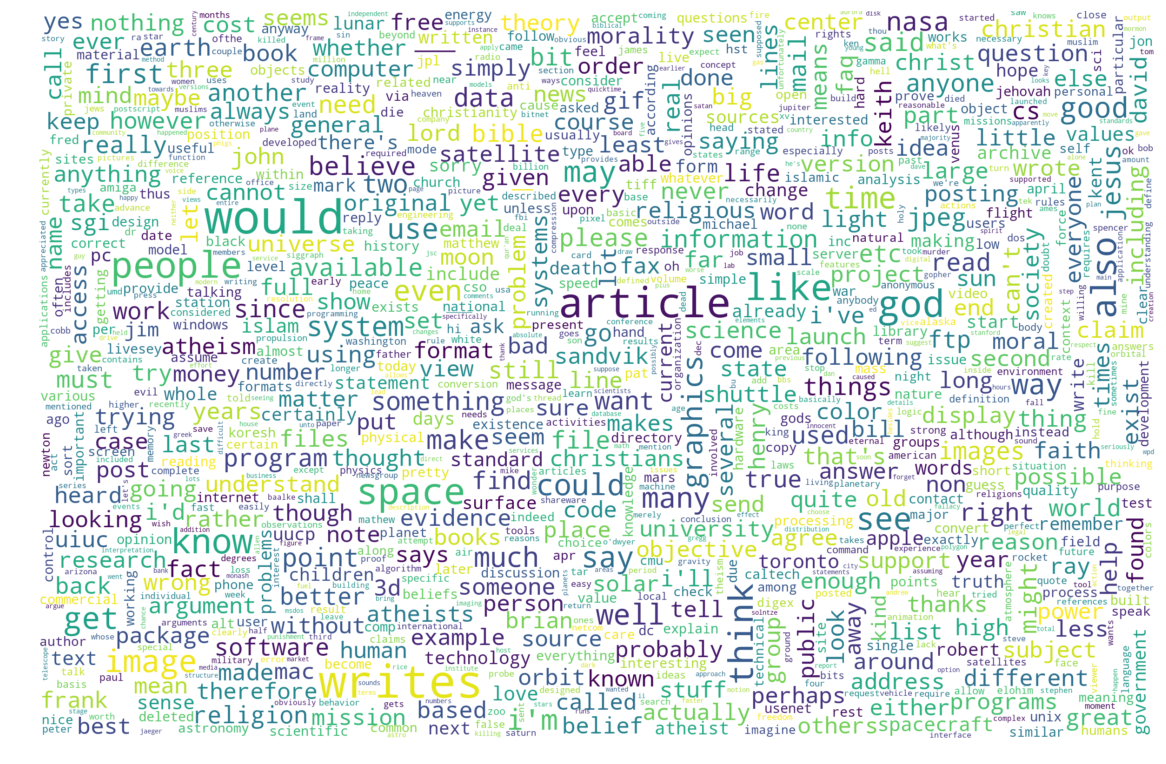

In [23]:
plot_wordcloud_from_list(Counter(tokens).most_common(1000))

## 3) Form term document matrix, whose (i,j)-th entry is the number of occurrences of word i in document j.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 

def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    print("Fit...")
    vectorizer.fit(docs)
    print("Transform...")
    x1 = vectorizer.transform(raw_documents)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())
    if xColNames is not None:
        df.columns = xColNames

    return df



In [26]:
# fn_tdm_df(df.text, 
#           stop_words=tlds + english_stopwords, 
#           analyzer='word', 
#           ngram_range=(2,100), 
#           lowercase=True, 
#           token_pattern=MY_REGEX,
#           max_features=1000
#          )  

Fit...


KeyboardInterrupt: 

This is taking way too much time....
Let's try a different approach.

In [29]:
top_words = [x[0] for x in Counter(tokens).most_common(1000)]
df.head()

,From,Subject,Lines,Organization,text
0,healta@saturn.wwc.edu (Tammy R Healy),"Re: who are we to judge, Bobby?",38,Walla Walla College,In article <1993Apr14.213356.22176@ultb.isc.ri...
1,jk87377@lehtori.cc.tut.fi (Kouhia Juhana),Re: More gray levels out of the screen,21,Tampere University of Technology,In article <1993Apr6.011605.909@cis.uab.edu> s...
2,hamlin@ug.eds.com (Griff Hamlin),PHIGS User Group Conference,173,"EDS Unigraphics, Cypress CA",FIRST ANNUAL PHIGS USER GROUP ...
3,joslin@pogo.isp.pitt.edu (David Joslin),Re: Language and agreement,59,Intelligent Systems Program,"I responded to Jim's other articles today, but..."
4,adaptive@cs.nps.navy.mil (zyda res acct),"Re: 3d Head model ... (not again, groan)",40,"Naval Postgraduate School, Monterey",">O.K., sorry to post a question which seems to..."


In [40]:
len_words = len(top_words)
len_docs = len(df)

term_document_matrix = np.zeros((len_words,len_docs), dtype=int)

In [41]:
for i, word in enumerate(top_words):
    for j, doc in enumerate(df.text):
        clear_output(wait=True)
        print("Document %d of %d, word %d of %d" % (j, len_docs, i, len_words))
        term_document_matrix[i, j] = doc.lower().count(word)

Document 3267 of 3387, word 999 of 1000


In [46]:
term_document_matrix

array([[1, 0, 0, ..., 1, 0, 0],
       [2, 1, 0, ..., 2, 0, 0],
       [2, 1, 0, ..., 2, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
#import pickle
#pickle.dump(term_document_matrix, open('term_document_matrix.pickle', 'wb'))

In [ ]:
#term_document_matrix = pickle.load(open('term_document_matrix.pickle', 'rb'))

In [48]:
td_df = pd.DataFrame(term_document_matrix)

In [52]:
td_df = td_df.transpose()

In [60]:
td_df

,would,writes,article,god,like,people,space,know,also,think,...,independent,drive,besides,suppose,voice,gave,total,areas,chance,absolute
0,1,2,2,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,5,0,0,0,0,0,0,1,...,0,3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,3,1,25,1,1,0,...,1,1,0,0,0,0,0,0,0,0
9,0,2,1,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y_df = pd.DataFrame(y)

## 4) Implement a spectral clustering algorithm for the dataset, as follows:

* a. How would you choose the number of appropriate dimensions based on the attached article nips02-AA35.pdf ?
If you can't answer a. then please continue to the next sections, with any number of dimensions.
* b. Embed the dataset in the number of dimensions you chose.
* c. Implement a k-means algorithm to cluster the documents into four groups.
* d. So far, you have not used the topic labels available to you. Propose a
   way to measure the quality of your classification and report it.

In [67]:
from sklearn.cluster import SpectralClustering
clusterizer = SpectralClustering(n_clusters=4, eigen_solver='amg')
y_pred = clusterizer.fit_predict(td_df)

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [80]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)